## PACKAGES

In [1]:
#pip install geopandas

In [39]:
import geopandas as gp

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Read the whole shapefile

In [2]:
pwd

'/Users/amelietatin/code/amelietatin/Predicting_land_cover/notebooks'

In [3]:
all_protected_areas = gp.read_file("../raw_data/all_protected_areas_shp/Natura2000_end2022_epsg3035.shp")

In [4]:
all_protected_areas.head(2)

,SITECODE,SITENAME,RELEASE_DA,MS,SITETYPE,INSPIRE_ID,area,geometry
0,BG0002104,Tsibarsko blato,2021-12-15,BG,A,None,9097408.781,"POLYGON ((5400559.283 2397105.657, 5400557.363..."
1,CY3000006,THALASSIA PERIOCHI NISIA,2022-10-18,CY,B,None,1917559.082,"POLYGON ((6501132.084 1672770.796, 6501815.998..."


In [5]:
all_protected_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27193 entries, 0 to 27192
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SITECODE    27193 non-null  object  
 1   SITENAME    27193 non-null  object  
 2   RELEASE_DA  27193 non-null  object  
 3   MS          27193 non-null  object  
 4   SITETYPE    27193 non-null  object  
 5   INSPIRE_ID  3486 non-null   object  
 6   area        27193 non-null  float64 
 7   geometry    27193 non-null  geometry
dtypes: float64(1), geometry(1), object(6)
memory usage: 1.7+ MB


In [6]:
type(all_protected_areas)

geopandas.geodataframe.GeoDataFrame

In [7]:
all_protected_areas.SITECODE.nunique() # NUMBER OF UNIQUE PROTECTED AREAS IDs

27193

In [8]:
all_protected_areas.SITETYPE.unique() # DIFFERENT SITE TYPES

array(['A', 'B', 'C'], dtype=object)

# Select only the polygons

In [9]:
polygons_pa = all_protected_areas[all_protected_areas.geometry.type == 'Polygon']

In [10]:
type(polygons_pa)

geopandas.geodataframe.GeoDataFrame

In [11]:
polygons_pa.SITECODE.nunique()

19238

In [12]:
polygons_pa.SITETYPE.unique()

array(['A', 'B', 'C'], dtype=object)

# Select only type C

In [25]:
polygons_type_C_pa = polygons_pa[polygons_pa.SITETYPE == 'C']

In [26]:
type(polygons_type_C_pa)

geopandas.geodataframe.GeoDataFrame

In [27]:
polygons_type_C_pa.SITECODE.nunique()

1349

# Select on area size

<Axes: ylabel='Count'>

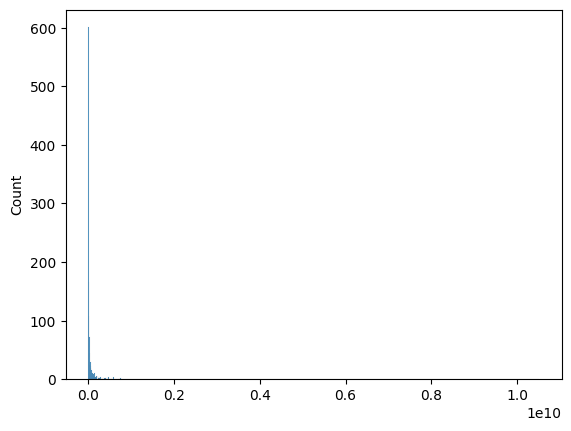

In [41]:
sns.histplot(polygons_type_C_pa.area)

In [44]:
all_protected_areas.area.describe()

count    2.719300e+04
mean     5.834623e+07
std      6.431153e+08
min      1.017281e+00
25%      4.346933e+05
50%      2.825788e+06
75%      1.822086e+07
max      7.196047e+10
dtype: float64

In [46]:
polygons_type_C_pa.area.describe()

count    1.349000e+03
mean     1.042316e+08
std      4.561199e+08
min      7.502846e+03
25%      2.448960e+06
50%      1.064924e+07
75%      4.639470e+07
max      1.051245e+10
dtype: float64

## Filter between 25% and 75%

In [47]:
filtered_area_pa = polygons_type_C_pa[(polygons_type_C_pa['area'] > 2.448960e+06) & (polygons_type_C_pa['area'] < 4.639470e+07)]

In [51]:
len(filtered_area_pa)

674

# Select random protected areas

In [72]:
filtered_area_pa_50 = filtered_area_pa.sample(50, random_state=1) 
filtered_area_pa_10 = filtered_area_pa.sample(10, random_state=1) 

# Center of each polygon

In [73]:
filtered_area_pa_50["centroid_lon_lat"]=filtered_area_pa_50["geometry"].centroid.to_crs(epsg=4326)
filtered_area_pa_50["lon"] = filtered_area_pa_50.centroid_lon_lat.x
filtered_area_pa_50["lat"] = filtered_area_pa_50.centroid_lon_lat.y

In [74]:
filtered_area_pa_10["centroid_lon_lat"]=filtered_area_pa_10["geometry"].centroid.to_crs(epsg=4326)
filtered_area_pa_10["lon"] = filtered_area_pa_10.centroid_lon_lat.x
filtered_area_pa_10["lat"] = filtered_area_pa_10.centroid_lon_lat.y

#  Write new file

In [75]:
final_df_50 = filtered_area_pa_50[['SITECODE', 'SITENAME','geometry', 'lon', 'lat']]

In [76]:
final_df_10 = filtered_area_pa_10[['SITECODE', 'SITENAME','geometry', 'lon', 'lat']]

In [77]:
!pwd

/Users/amelietatin/code/amelietatin/Predicting_land_cover/notebooks


In [78]:
final_df_50.to_file('../raw_data/sample_protected_areas/sample_filtered_protected_areas_50.shp')
final_df_10.to_file('../raw_data/sample_protected_areas/sample_filtered_protected_areas_10.shp')